# <font color='maroon'>Assessment</font>
Given the following dataset, answer the questions that follow. The necessary libraries have been imported.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import scipy.stats as stats
import pandas as pd
from pandas import Series
import seaborn as sns
import random as rnd

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('athletes.csv', sep=',', low_memory=False)

### Question 1
Study the data. What is the size of the dataset?

In [4]:
#Answer
'Data contains' +' '+  str(data.shape[0]) +' '+ 'rows, each with ' +  str(data.shape[1]) +' columns'

'Data contains 423006 rows, each with 28 columns'

#### Question 1.1
Generate summary statistics of the data.

In [5]:
data.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


#### Question 1.2
Are the any missing values?  A simple strategy would be to remove rows with missing values. This can however reduce the size of the dataset. Another technique is to imput missing values with a sensible value like the mean.

For more on how to deal with missing values, see this blog entry: [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/).

In [6]:
print(data.isnull().sum())
#Answer: Yes, there are some missing values in the dataset. The best solution will be to remove the missing values: weight and height
#        that makes the dataset more manageble, but removing the values will make that dataset small. We decided to replace NaN

# Removing missing records
df = data.loc[(data['height'] >= 0) & (data['weight'] >=0)] 

# summarize the number of rows and columns in the dataset
'Data contains' +' '+  str(df.shape[0]) +' '+ 'rows, each with ' +  str(df.shape[1]) +' columns'

'Data contains 144428 rows, each with 28 columns'

### Question 2

Study the `height` column. What distribution does the data follow? 
Hint: Use a histogram or density plot to visualise the data.

Text(0, 0.5, 'Count')

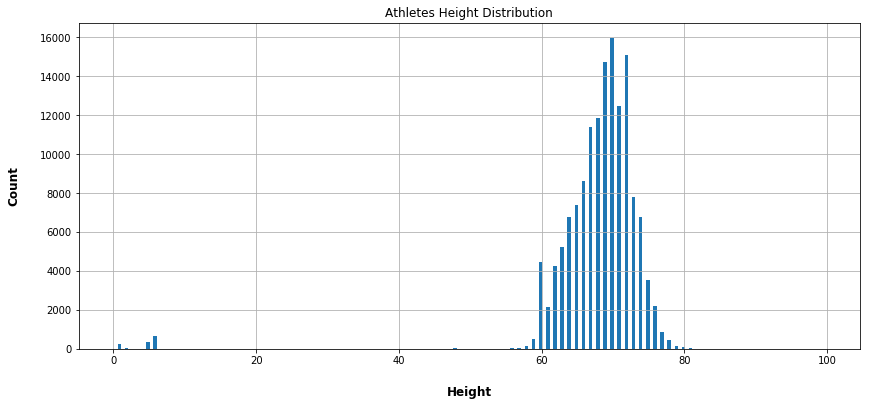

In [7]:
bin_values = np.arange(start=.10, stop=100, step=.50)
x = df['height'].hist(bins=bin_values, figsize=[14,6])

# title
x.set_title("Athletes Height Distribution")

# Set x-axis label
x.set_xlabel("Height", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Count", labelpad=20, weight='bold', size=12)
    

### Question 3
What is the average height?

In [8]:
df['height'].mean()

126.35414878001495

### Question 4

Use simple random sampling to sample from the dataset. Choose a sample of 20000.

In [9]:
rs = data.sample(20000, replace=True, random_state=1)
rs.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,20000.000000,15665.000000,7600.000000,10876.000000,2652.000000,1428.000000,1947.000000,951.000000,1.410000e+03,1044.000000,1699.000000,4946.000000,4603.000000,5497.000000,5287.000000,2459.000000
mean,290655.011650,32.506926,67.980789,170.788157,323.429110,624.415966,222.432974,1641.117771,6.225774e+03,122.094828,1413.450853,189.447028,145.346513,334.718392,272.780026,60.468483
std,184512.566867,7.716005,7.489161,37.429179,219.261863,213.917530,219.610814,1022.157924,2.233913e+05,437.833082,340.046706,72.033905,57.477774,119.428022,98.431756,1612.932028
min,1630.000000,14.000000,1.000000,2.000000,2.000000,61.000000,21.000000,45.000000,0.000000e+00,24.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133702.000000,27.000000,66.000000,145.000000,215.750000,525.000000,148.000000,1323.000000,2.420000e+02,62.000000,1232.000000,145.000000,110.000000,260.000000,205.000000,16.000000
50%,273341.500000,31.000000,69.000000,170.000000,289.000000,593.000000,191.000000,1560.000000,2.940000e+02,70.000000,1355.000000,195.000000,145.000000,345.000000,275.000000,27.000000
75%,471014.750000,37.000000,72.000000,192.000000,391.000000,692.000000,255.000000,1822.500000,3.330000e+02,82.000000,1530.000000,235.000000,185.000000,415.000000,335.000000,39.000000
max,633083.000000,56.000000,157.000000,1750.000000,6000.000000,6000.000000,6000.000000,29520.000000,8.388607e+06,7200.000000,7200.000000,1984.000000,1323.000000,2756.000000,992.000000,80000.000000


### Question 4

Use stratified sampling to sample from the dataset. Choose a sample of 20000.

In [14]:
dc = df.groupby('gender')
print(dc.describe())

stratified = df.groupby('gender').apply(lambda x: x.sample(frac=0.013849))
print(stratified.describe())

             age                                                      \
           count       mean       std   min   25%   50%   75%    max   
gender                                                                 
--          13.0  31.615385  5.172660  25.0  28.0  29.0  37.0   39.0   
Female   44301.0  32.003476  7.665771  14.0  26.0  31.0  37.0  124.0   
Male    100114.0  32.496364  7.636092  13.0  27.0  31.0  37.0  125.0   

       athlete_id                  ...    snatch               weight  \
            count           mean   ...       75%        max     count   
gender                             ...                                  
--           13.0  579504.846154   ...     91.25      155.0      13.0   
Female    44301.0  258590.663394   ...    115.00     8095.0   44301.0   
Male     100114.0  235591.954242   ...    195.00  8388607.0  100114.0   

                                                                   
              mean        std    min    25%    50%    75%   

In [11]:
size = 1000        # sample size
replace = True  # with replacement

fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
strFemaleSample = df.groupby(df['gender'] == 'female', as_index=False).apply(fn)
strFemaleSample.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,1000.000000,1000.000000,1000.000000,1000.00000,364.000000,198.000000,261.000000,131.000000,186.000000,147.000000,224.000000,631.000000,586.000000,706.000000,679.000000,314.000000
mean,230812.477000,32.535000,68.688000,173.67600,319.835165,606.085859,220.402299,1662.664122,271.741935,132.727891,1422.450893,190.941363,145.080205,335.915014,272.602356,30.302548
std,174550.936433,7.674482,21.795727,35.24675,140.482974,128.125524,108.663148,572.247776,114.019714,395.756854,375.322459,78.904592,54.879218,112.893139,98.665466,57.179060
min,1904.000000,16.000000,1.000000,1.00000,61.000000,61.000000,61.000000,61.000000,0.000000,50.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99323.750000,27.000000,66.000000,150.00000,224.500000,523.000000,149.000000,1356.500000,252.500000,63.000000,1253.000000,145.000000,110.000000,265.000000,205.000000,16.000000
50%,174922.500000,32.000000,69.000000,175.00000,298.000000,584.000000,194.000000,1606.000000,298.000000,72.000000,1380.000000,190.000000,145.000000,353.000000,280.000000,27.000000
75%,346617.500000,37.000000,72.000000,195.00000,374.000000,676.500000,259.000000,1884.000000,334.750000,83.500000,1560.000000,235.000000,185.000000,415.000000,340.000000,38.000000
max,628524.000000,56.000000,709.000000,390.00000,1162.000000,1090.000000,705.000000,6039.000000,503.000000,3600.000000,5402.000000,1175.000000,286.000000,650.000000,575.000000,999.000000


### Question 5
Compare simple random sampling and stratified random sampling. Compare the means generated by the two sampling techniques and discuss your observations below your code.

*Answer: The mean generated by the random sample is a little higher than the mean that is generated by the stratified sample because it is more representative of the gender of the participants.The stratified samples are closer to each other*

### Question 6 

In  this question we are going to implement cluster sampling. Data is divided into clusters, if it isn't already divided into clusters, and then we use simple random sampling to select a number of clusters from the sample. From the group of selected clusters, we again use simple random sampling to select random data points. These now form our sample.  

Let's implement this procedure using some randomly generated data that we are going to group into clusters.

In [12]:
sampleGender = []
n = 2   # number of samples
j = 10  # size of each sample
for i in range(n):
    sampleGender.append(rnd.sample(list(data['gender']), k=j)) 

print(np.random.choice(sampleGender[1]))

Female


Now that we've generated random data and placed the data into clusters, generate a sample from the *athletes* data using cluster sampling technique.

In [13]:
dc = df.groupby('gender')
print(dc.describe())

stratified = df.groupby('gender').apply(lambda x: x.sample(frac=0.013849))
print(stratified)


             age                                                      \
           count       mean       std   min   25%   50%   75%    max   
gender                                                                 
--          13.0  31.615385  5.172660  25.0  28.0  29.0  37.0   39.0   
Female   44301.0  32.003476  7.665771  14.0  26.0  31.0  37.0  124.0   
Male    100114.0  32.496364  7.636092  13.0  27.0  31.0  37.0  125.0   

       athlete_id                  ...    snatch               weight  \
            count           mean   ...       75%        max     count   
gender                             ...                                  
--           13.0  579504.846154   ...     91.25      155.0      13.0   
Female    44301.0  258590.663394   ...    115.00     8095.0   44301.0   
Male     100114.0  235591.954242   ...    195.00  8388607.0  100114.0   

                                                                   
              mean        std    min    25%    50%    75%   

<!-- Distribution fitting with scipy exercise given a dataset. Good references about El Nino dataset. I should find a climate dataset.

https://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524#16651524

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python -->